In [83]:
import sys, getopt, os
import bonesis
import pandas as pd
from colomoto_jupyter import tabulate
import mpbn
import itertools
import math
import numpy
import networkx as nx
import pickle
#import ginsim
import re
import subprocess
import numpy as np
from matplotlib import pyplot as plt
from math import isnan
import clingo as asp
import mpbn

In [84]:
from copy import deepcopy 

In [85]:
sys.path.append('../py_src/')
import funForBonesis

In [86]:
geneOrder = ["Egr1","Junb","Bclaf1","Myc","Fli1","Gata2","Spi1","Cebpa","Gata1","Klf1","Tal1","Ikzf1","Zfpm1","CDK46CycD","CIPKIP"]


In [87]:
#dataTable = pd.read_csv("../input/obsDataLarge.csv",index_col = 0)
dataTable = pd.read_csv("../output/Inference/obsDataDis.csv",index_col = 0)

#Add some mutant obs

data = dataTable.to_dict("index")



clean_data = dict() #Bug of mpbn if nan in dict
for o in data.keys():
    clean_data[o] = {k: data[o][k] for k in data[o] if not isnan(data[o][k])}



obsData = pd.DataFrame.from_dict(data, orient="index").fillna('')[geneOrder]

obsData = obsData[geneOrder].reindex(["iHSC", "srHSC", "qHSC","preDiff","pLymph","pNeuMast","pMk","pEr","zero"])

obsData = obsData.transpose()
obsData.rename(columns = {'zero':'zeros'}, inplace = True)
obsData.rename(columns = {'CDK4/6CycD':'CDK46CycD'}, inplace = True)



obsData.index = ['Egr1', 'Junb', 'Bclaf1', 'Myc', 'Fli1', 'Gata2', 'Spi1', 'Cebpa',
       'Gata1', 'Klf1', 'Tal1', 'Ikzf1', 'Zfpm1', 'CDK46CycD', 'CIPKIP']
obsDataView = obsData.style.apply(lambda x: ["background: ligthgrey" if v == "" else  "background: darkred" if v == 1.0 else "background: darkblue" for v in x], axis = 1).apply(lambda x: ["color: lightgrey" if v == "" else  "color: darkred" if v == 1.0 else "color: darkblue" for v in x], axis = 1)


obsDataView.set_precision(0)

,iHSC,srHSC,qHSC,preDiff,pLymph,pNeuMast,pMk,pEr,zeros
Egr1,0,0,1,0,0,0,0,0,nan
Junb,0,0,1,0,0,0,0,0,nan
Bclaf1,1,1,0,1,1,0,0,0,nan
Myc,0,0,1,1,0,1,1,1,nan
Fli1,1,1,1,0,0,0,1,0,nan
Gata2,1,0,1,0,1,1,0,0,nan
Spi1,0,0,0,1,1,1,0,0,nan
Cebpa,0,0,0,0,0,1,0,0,nan
Gata1,0,0,0,0,0,0,1,1,nan
Klf1,0,0,0,0,0,0,0,1,nan


In [88]:
## Adjustement
dataTable["Myc"].loc["pNeuMast"] =  float('NaN')
dataTable["Myc"].loc["pEr"] =  float('NaN')
dataTable["Myc"].loc["pMk"] =  float('NaN')
dataTable["CDK46CycD"].loc["pMk"] =  float('NaN')
dataTable["Bclaf1"].loc["pLymph"] =  float('NaN')
dataTable["CIPKIP"].loc["pLymph"] =  float('NaN')

dataTable["Egr1"].loc["srHSC"] =  float('NaN')
dataTable["Gata2"].loc["pNeuMast"] =  float('NaN')



data = dataTable.to_dict("index")


clean_data = dict() #Bug of mpbn if nan in dict
for o in data.keys():
    clean_data[o] = {k: data[o][k] for k in data[o] if not isnan(data[o][k])}

data= clean_data
## add mutant obs
data["G0pMk"] = {'Junb': 1,
 'Tal1': 1.0,
 'Ikzf1': 0,
 'Spi1': 0,
 'Cebpa': 0,
 'Klf1': 0,
 'CIPKIP': 1,
 'CDK46CycD': 0.0}

data["G2MpNeuMast"] = {'Egr1': 0.0,
 'Junb': 0,
 'Tal1': 0.0,
 'Fli1': 0.0,
 'Ikzf1': 0,
 'Spi1': 1,
 'Cebpa': 1,
 'Klf1': 0,
 'Zfpm1': 0.0,
 'CIPKIP': 0,
 'CDK46CycD': 1.0}

data["pME"] = {'Egr1': 0.0,
 'Junb': 1,
 'Bclaf1': 1.0,
 'Myc': 1.0,
 'Fli1': 0,
 'Gata2': 0.0,
 'Spi1': 0,
 'Cebpa': 0,
 'Gata1': 0,
 'Klf1': 0,
 'CDK46CycD': 0.0,
 'CIPKIP': 0.0}

obsData = pd.DataFrame.from_dict(data, orient="index").fillna('')[geneOrder]

#Add some mutant obs

obsData = obsData[geneOrder].reindex(["iHSC", "srHSC", "qHSC","preDiff","pME","pLymph","pNeuMast","pMk","pEr","zero","G0pMk",'G2MpNeuMast'])


obsData = obsData.transpose()
obsData.index = ['Egr1', 'Junb', 'Bclaf1', 'Myc', 'Fli1', 'Gata2', 'Spi1', 'Cebpa',
       'Gata1', 'Klf1', 'Tal1', 'Ikzf1', 'Zfpm1', 'CDK46CycD', 'CIPKIP']
obsDataView = obsData.style.apply(lambda x: ["background: ligthgrey" if v == "" else  "background: darkred" if v == 1.0 else "background: darkblue" for v in x], axis = 1).apply(lambda x: ["color: lightgrey" if v == "" else  "color: darkred" if v == 1.0 else "color: darkblue" for v in x], axis = 1)


obsDataView.set_precision(0)

/Users/leonard/bin/miniconda3/envs/mostPermBn/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,iHSC,srHSC,qHSC,preDiff,pME,pLymph,pNeuMast,pMk,pEr,zero,G0pMk,G2MpNeuMast
Egr1,0,,1,0,0,0,0,0,0,nan,,0
Junb,0,0,1,0,1,0,0,0,0,nan,1,0
Bclaf1,1,1,0,1,1,,0,0,0,nan,,
Myc,0,0,1,1,1,0,,,,nan,,
Fli1,1,1,1,0,0,0,0,1,0,nan,,0
Gata2,1,0,1,0,0,1,,0,0,nan,,
Spi1,0,0,0,1,0,1,1,0,0,nan,0,1
Cebpa,0,0,0,0,0,0,1,0,0,nan,0,1
Gata1,0,0,0,0,0,0,0,1,1,nan,,
Klf1,0,0,0,0,0,0,0,0,1,nan,0,0


In [89]:
with open("../output/Inference/bonesis/possible_final_solutions.p", "rb") as input_file:
    solutions = pickle.load(input_file)

In [90]:
len(solutions)

616

In [91]:
table = pd.DataFrame(solutions)
table.sort_values(by=geneOrder, inplace=True)
table[geneOrder]

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
105,Gata2&Junb,Egr1|Myc,Myc,Bclaf1&Cebpa,Junb|(Gata1&!Klf1),(!Gata1&Egr1)|(!Gata1&Gata2)|(!Spi1&Gata2&!Zfpm1),(!Gata1&Spi1)|(!Gata1&!Gata2&Cebpa),(!Ikzf1&Gata2)|(!Ikzf1&Spi1),Fli1|(Gata1&!Ikzf1)|(!Spi1&Gata2),Gata1&!Fli1,Gata1&!Spi1,Gata2,Gata1,Myc&Bclaf1,Junb
362,Gata2&Junb,Egr1|Myc,Myc,Bclaf1&Cebpa,Junb|(Gata1&!Klf1),(!Gata1&Egr1)|(!Gata1&Gata2)|(!Spi1&Gata2&!Zfpm1),(!Gata1&Spi1)|(!Gata1&!Gata2&Cebpa),(!Ikzf1&Gata2)|(!Ikzf1&Spi1),Fli1|(Gata1&!Ikzf1)|(!Spi1&Gata2),Gata1&!Fli1,Gata1&!Spi1,Gata2,Gata1,Bclaf1|Myc,Junb
25,Gata2&Junb,Egr1|Myc,Myc,Bclaf1&Cebpa,Junb|(Gata1&!Klf1),(!Gata1&Egr1)|(!Gata1&Gata2)|(!Spi1&Gata2&!Zfpm1),(!Gata1&Spi1)|(!Gata1&!Gata2&Cebpa),(!Ikzf1&Gata2)|(!Ikzf1&Spi1),Fli1|(!Spi1&Gata2)|(Gata1&!Spi1&!Ikzf1),Gata1&!Fli1,Gata1&!Spi1,Gata2,Gata1,Myc&Bclaf1,Junb
154,Gata2&Junb,Egr1|Myc,Myc,Bclaf1&Cebpa,Junb|(Gata1&!Klf1),(!Gata1&Egr1)|(!Gata1&Gata2)|(!Spi1&Gata2&!Zfpm1),(!Gata1&Spi1)|(!Gata1&!Gata2&Cebpa),(!Ikzf1&Gata2)|(!Ikzf1&Spi1),Fli1|(!Spi1&Gata2)|(Gata1&!Spi1&!Ikzf1),Gata1&!Fli1,Gata1&!Spi1,Gata2,Gata1,Bclaf1|Myc,Junb
196,Gata2&Junb,Egr1|Myc,Myc,Bclaf1&Cebpa,Junb|(Gata1&!Klf1),(!Gata1&Egr1)|(!Gata1&Gata2)|(!Zfpm1&!Spi1&Egr1),(!Gata1&Spi1)|(!Gata1&!Gata2&Cebpa),(!Ikzf1&Gata2)|(!Ikzf1&Spi1),Fli1|(Gata1&!Ikzf1)|(!Spi1&Gata2),Gata1&!Fli1,Gata1&!Spi1,Gata2,Gata1,Myc&Bclaf1,Junb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Gata2&Junb,Egr1|Myc,Myc,Bclaf1&Cebpa,(Gata1&Junb)|(Gata1&!Klf1)|(!Klf1&Junb),(!Zfpm1&!Spi1&Egr1)|(!Gata1&Gata2&!Zfpm1)|(!Sp...,(!Gata1&Spi1)|(!Gata1&!Gata2&Cebpa),(!Ikzf1&Gata2)|(!Ikzf1&Spi1),Fli1|(!Spi1&Gata2)|(Gata1&!Spi1&!Ikzf1),Gata1&!Fli1,Gata1&!Spi1,Gata2,Gata1,Bclaf1|Myc,Junb
451,Gata2&Junb,Egr1|Myc,Myc,Bclaf1&Cebpa,(Gata1&Junb)|(Gata1&!Klf1)|(!Klf1&Junb),(!Zfpm1&!Spi1&Egr1)|(!Gata1&!Spi1&Gata2)|(!Gat...,(!Gata1&Spi1)|(!Gata1&!Gata2&Cebpa),(!Ikzf1&Gata2)|(!Ikzf1&Spi1),Fli1|(Gata1&!Ikzf1)|(!Spi1&Gata2),Gata1&!Fli1,Gata1&!Spi1,Gata2,Gata1,Myc&Bclaf1,Junb
71,Gata2&Junb,Egr1|Myc,Myc,Bclaf1&Cebpa,(Gata1&Junb)|(Gata1&!Klf1)|(!Klf1&Junb),(!Zfpm1&!Spi1&Egr1)|(!Gata1&!Spi1&Gata2)|(!Gat...,(!Gata1&Spi1)|(!Gata1&!Gata2&Cebpa),(!Ikzf1&Gata2)|(!Ikzf1&Spi1),Fli1|(Gata1&!Ikzf1)|(!Spi1&Gata2),Gata1&!Fli1,Gata1&!Spi1,Gata2,Gata1,Bclaf1|Myc,Junb
179,Gata2&Junb,Egr1|Myc,Myc,Bclaf1&Cebpa,(Gata1&Junb)|(Gata1&!Klf1)|(!Klf1&Junb),(!Zfpm1&!Spi1&Egr1)|(!Gata1&!Spi1&Gata2)|(!Gat...,(!Gata1&Spi1)|(!Gata1&!Gata2&Cebpa),(!Ikzf1&Gata2)|(!Ikzf1&Spi1),Fli1|(!Spi1&Gata2)|(Gata1&!Spi1&!Ikzf1),Gata1&!Fli1,Gata1&!Spi1,Gata2,Gata1,Myc&Bclaf1,Junb


In [92]:
table.nunique()

Bclaf1        1
CDK46CycD     2
CIPKIP        1
Cebpa         1
Egr1          1
Fli1          2
Gata1         2
Gata2        77
Ikzf1         1
Junb          1
Klf1          1
Myc           1
Spi1          1
Tal1          1
Zfpm1         1
dtype: int64

In [93]:
table.nunique().index

Index(['Bclaf1', 'CDK46CycD', 'CIPKIP', 'Cebpa', 'Egr1', 'Fli1', 'Gata1',
       'Gata2', 'Ikzf1', 'Junb', 'Klf1', 'Myc', 'Spi1', 'Tal1', 'Zfpm1'],
      dtype='object')

In [94]:
pd.DataFrame(table["Gata2"].unique()).to_csv("tables/Gata2_rules.csv")

In [95]:
for n in table.nunique().index:
    if table.nunique()[n] > 1:
        print(n)
        print(pd.DataFrame(table[n].unique())) 


CDK46CycD
            0
0  Myc&Bclaf1
1  Bclaf1|Myc
Fli1
                                         0
0                       Junb|(Gata1&!Klf1)
1  (Gata1&Junb)|(Gata1&!Klf1)|(!Klf1&Junb)
Gata1
                                         0
0        Fli1|(Gata1&!Ikzf1)|(!Spi1&Gata2)
1  Fli1|(!Spi1&Gata2)|(Gata1&!Spi1&!Ikzf1)
Gata2
                                                    0
0   (!Gata1&Egr1)|(!Gata1&Gata2)|(!Spi1&Gata2&!Zfpm1)
1    (!Gata1&Egr1)|(!Gata1&Gata2)|(!Zfpm1&!Spi1&Egr1)
2   (!Gata1&Egr1)|(!Gata1&Gata2)|(!Zfpm1&!Spi1&Gat...
3   (!Gata1&Egr1)|(!Gata1&Gata2&!Zfpm1)|(!Spi1&Gat...
4   (!Gata1&Egr1)|(!Gata1&Gata2&!Zfpm1)|(!Zfpm1&!S...
..                                                ...
72  (!Zfpm1&Gata2&Egr1)|(!Zfpm1&!Spi1&Egr1)|(!Gata...
73          (!Zfpm1&!Spi1&Egr1)|(!Gata1&Gata2&!Zfpm1)
74  (!Zfpm1&!Spi1&Egr1)|(!Gata1&Gata2&!Zfpm1)|(!Ga...
75  (!Zfpm1&!Spi1&Egr1)|(!Gata1&Gata2&!Zfpm1)|(!Sp...
76  (!Zfpm1&!Spi1&Egr1)|(!Gata1&!Spi1&Gata2)|(!Gat...

[77 rows x 1 columns]


In [96]:
keptRules = mpbn.MPBooleanNetwork({
    "Fli1":"Junb|(Gata1&!Klf1)",
    "Gata2": "(!Gata1&Gata2&!Zfpm1)|(!Spi1&Egr1&!Zfpm1&!Gata1)",
    "CDK46CycD": "Myc|Bclaf1",
    "Gata1":"Fli1|(!Spi1&Gata2)|(!Spi1&!Ikzf1&Gata1)"})
keptRules

CDK46CycD <- Myc|Bclaf1
Fli1 <- Junb|(Gata1&!Klf1)
Gata1 <- Fli1|(!Spi1&Gata2)|(!Spi1&!Ikzf1&Gata1)
Gata2 <- (!Gata1&Gata2&!Zfpm1)|(!Spi1&Egr1&!Zfpm1&!Gata1)

In [97]:
keptRules.keys()

dict_keys(['Fli1', 'Gata2', 'CDK46CycD', 'Gata1'])

In [98]:
tableFinal = table.copy()
for n in keptRules.keys():
    if table.nunique()[n] > 1:
        print(n)
        tableFinal = tableFinal[(tableFinal[n] == keptRules[n])]

Fli1
Gata2
CDK46CycD
Gata1


In [99]:
len(tableFinal)


1

In [100]:
for n in tableFinal.nunique().index:
    if tableFinal.nunique()[n] > 1:
        print(n)
        print(pd.DataFrame(tableFinal[n].unique())) 


In [101]:
solutionFinal = solutions[tableFinal.index[0]] #### result order should be stable with the sorting
print(solutionFinal)

Bclaf1 <- Myc
CDK46CycD <- Bclaf1|Myc
CIPKIP <- Junb
Cebpa <- (!Ikzf1&Gata2)|(!Ikzf1&Spi1)
Egr1 <- Gata2&Junb
Fli1 <- Junb|(Gata1&!Klf1)
Gata1 <- Fli1|(!Spi1&Gata2)|(Gata1&!Spi1&!Ikzf1)
Gata2 <- (!Gata1&Gata2&!Zfpm1)|(!Gata1&!Zfpm1&!Spi1&Egr1)
Ikzf1 <- Gata2
Junb <- Egr1|Myc
Klf1 <- Gata1&!Fli1
Myc <- Bclaf1&Cebpa
Spi1 <- (!Gata1&Spi1)|(!Gata1&!Gata2&Cebpa)
Tal1 <- Gata1&!Spi1
Zfpm1 <- Gata1



In [102]:
solGisSim = solutionFinal.copy()
solGisSim["CDK46CycD"] = solGisSim.pop("CDK46CycD")
solGisSim = solGisSim.to_biolqm()
solGisSim = biolqm.to_ginsim(solGisSim)
solGisSim.save('solutionFinal.zginml')

## Save rules

In [103]:
tableFinal[geneOrder].transpose()
tableFinal[geneOrder].transpose().to_csv("tables/final_Boolean_model.csv")

### Save interaction table

In [104]:
influenceGraphTable = pd.read_table("../output/Inference/influenceGraph/infGraphTable45.tsv")
influenceGraphTable = influenceGraphTable.drop_duplicates(subset=['tf', 'target', 'mor'])
# Creating influence graph 
inf0 = []
for r in influenceGraphTable.index:
    inf0.append((influenceGraphTable["tf"][r],influenceGraphTable["target"][r],dict(sign= influenceGraphTable["mor"][r])))

allEdges = funForBonesis.multiDiGraphToEdgeList(solutionFinal.influence_graph())

influenceGraphTable["solution"] = [True if inf0[e] in allEdges else False for e in range(len(inf0))]
influenceGraphTable[influenceGraphTable["solution"]].to_csv("tables/interactionTableFinalSol.csv")
influenceGraphTable[influenceGraphTable["solution"]]


,tf,mor,target,ref,interaction_proof_level,cell_line,cell_type_tissue,Trusted,Scenic,cistromeAdjScore,interaction0,solution
0,Bclaf1,1,CDK46CycD,NaN,NaN,NaN,NaN,0,True,NaN,Bclaf1_CDK46CycD,True
2,Bclaf1,1,Myc,NaN,NaN,NaN,NaN,0,True,NaN,Bclaf1_Myc,True
5,Cebpa,1,Myc,NaN,NaN,NaN,NaN,0,True,2.982833,Cebpa_Myc,True
6,Egr1,1,Junb,NaN,NaN,NaN,NaN,0,True,0.007750,Egr1_Junb,True
8,Egr1,1,Gata2,NaN,NaN,NaN,NaN,0,True,0.000000,Egr1_Gata2,True
12,Gata1,1,Klf1,Crossley_1994;Krumsiek_2011,transcriptionnal regulation,MEL,NaN,1,True,3.243200,Gata1_Klf1,True
13,Gata1,1,Gata1,Tsai_1991;Krumsiek_2011,transcriptionnal_regulation,MEL,NaN,1,True,2.538600,Gata1_Gata1,True
14,Gata2,1,Ikzf1,Malinge_2013,transcriptionnal regulation,G1ME,NaN,1,True,0.370300,Gata2_Ikzf1,True
17,Gata2,1,Cebpa,Cooper_2015,transcriptionnal regulation (+37 kb enhancer b...,NaN,32Dcl3,0,True,0.010200,Gata2_Cebpa,True
18,Gata2,1,Egr1,NaN,NaN,NaN,NaN,0,True,0.108300,Gata2_Egr1,True


# computing graph layout...


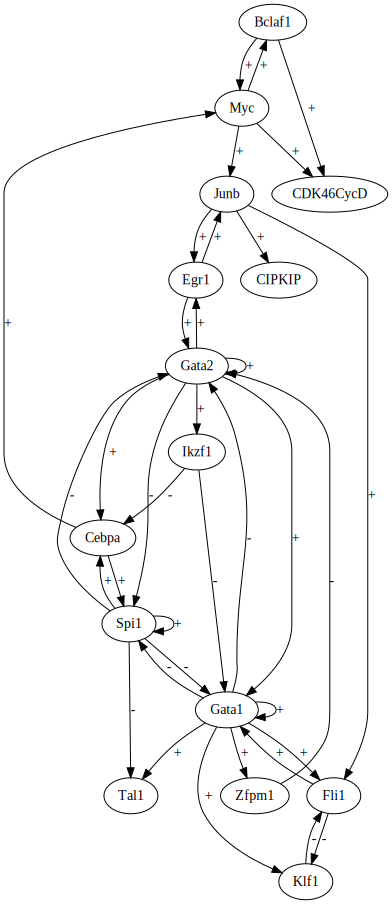

In [105]:
solutionFinal.influence_graph()

In [106]:
pd.DataFrame(solutionFinal.attractors(reachable_from=data["qHSC"]))
print(solutionFinal.reachability(data["qHSC"],data["preDiff"]))


True


In [107]:
pd.DataFrame(solutionFinal.attractors(reachable_from=data["iHSC"]))

,Zfpm1,Tal1,Spi1,Myc,Klf1,Junb,Ikzf1,Gata2,Gata1,Fli1,Egr1,Cebpa,CIPKIP,CDK46CycD,Bclaf1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0


In [108]:

att = pd.DataFrame(solutionFinal.attractors(reachable_from=data["iHSC"]))
att.index = ["zero","pLymph","pNeuMast","pMk","pEr"]
att = att[geneOrder].transpose()
attView = att.style.apply(lambda x: ["background: ligthgrey" if v == "" else  "background: darkred" if v == 1.0 else "background: darkblue" for v in x], axis = 1).apply(lambda x: ["color: lightgrey" if v == "" else  "color: darkred" if v == 1.0 else "color: darkblue" for v in x], axis = 1)

attView.set_precision(0)

,zero,pLymph,pNeuMast,pMk,pEr
Egr1,0,0,0,0,0
Junb,0,0,0,0,0
Bclaf1,0,0,0,0,0
Myc,0,0,0,0,0
Fli1,0,0,0,1,0
Gata2,0,1,0,0,0
Spi1,0,1,1,0,0
Cebpa,0,0,1,0,0
Gata1,0,0,0,1,1
Klf1,0,0,0,0,1


In [109]:
obsData[["iHSC", "srHSC", "qHSC","preDiff","pME"]]

,iHSC,srHSC,qHSC,preDiff,pME
Egr1,0,,1,0,0
Junb,0,0,1,0,1
Bclaf1,1,1,0,1,1
Myc,0,0,1,1,1
Fli1,1,1,1,0,0
Gata2,1,0,1,0,0
Spi1,0,0,0,1,0
Cebpa,0,0,0,0,0
Gata1,0,0,0,0,0
Klf1,0,0,0,0,0


In [110]:
obsDataFin = pd.concat([obsData[["iHSC", "srHSC", "qHSC","preDiff","pME"]], att], axis=1)
obsDataFin["srHSC"]["Egr1"] = 1


#obsDataFin = obsDataFin[geneOrder].reindex(["iHSC", "srHSC", "qHSC","preDiff","pME","pLymph","pNeuMast","pMk","pEr","zero"])

#obsDataFin = obsData.transpose()
obsDataFin.rename(columns = {'zero':'zeros'}, inplace = True)

obsDataFin.index = ['Egr1', 'Junb', 'Bclaf1', 'Myc', 'Fli1', 'Gata2', 'Spi1', 'Cebpa',
       'Gata1', 'Klf1', 'Tal1', 'Ikzf1', 'Zfpm1', 'CDK46CycD', 'CIPKIP']
obsDataFinView = obsDataFin.style.apply(lambda x: ["background: ligthgrey" if v == "" else  "background: darkred" if v == 1.0 else "background: darkblue" for v in x], axis = 1).apply(lambda x: ["color: lightgrey" if v == "" else  "color: darkred" if v == 1.0 else "color: darkblue" for v in x], axis = 1)



obsDataFinView.set_precision(0)

/Users/leonard/bin/miniconda3/envs/mostPermBn/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,iHSC,srHSC,qHSC,preDiff,pME,zeros,pLymph,pNeuMast,pMk,pEr
Egr1,0,1,1,0,0,0,0,0,0,0
Junb,0,0,1,0,1,0,0,0,0,0
Bclaf1,1,1,0,1,1,0,0,0,0,0
Myc,0,0,1,1,1,0,0,0,0,0
Fli1,1,1,1,0,0,0,0,0,1,0
Gata2,1,0,1,0,0,0,1,0,0,0
Spi1,0,0,0,1,0,0,1,1,0,0
Cebpa,0,0,0,0,0,0,0,1,0,0
Gata1,0,0,0,0,0,0,0,0,1,1
Klf1,0,0,0,0,0,0,0,0,0,1


In [111]:
data["srHSC_Egr1_0"] = deepcopy(data["srHSC"])
data["srHSC_Egr1_0"]["Egr1"] = 0

data

{'iHSC': {'Egr1': 0.0,
  'Junb': 0,
  'Bclaf1': 1.0,
  'Myc': 0.0,
  'Fli1': 1,
  'Gata2': 1.0,
  'Spi1': 0,
  'Cebpa': 0,
  'Gata1': 0,
  'Klf1': 0,
  'Tal1': 1.0,
  'Ikzf1': 0.0,
  'CDK46CycD': 0.0,
  'CIPKIP': 0.0},
 'srHSC': {'Junb': 0,
  'Bclaf1': 1.0,
  'Myc': 0.0,
  'Fli1': 1,
  'Gata2': 0.0,
  'Spi1': 0,
  'Cebpa': 0,
  'Gata1': 0,
  'Klf1': 0,
  'CDK46CycD': 1.0,
  'CIPKIP': 0.0},
 'qHSC': {'Egr1': 1.0,
  'Junb': 1,
  'Bclaf1': 0.0,
  'Myc': 1.0,
  'Fli1': 1,
  'Gata2': 1.0,
  'Spi1': 0,
  'Cebpa': 0,
  'Gata1': 0,
  'Klf1': 0,
  'Tal1': 1.0,
  'Ikzf1': 0.0,
  'CDK46CycD': 1.0,
  'CIPKIP': 1.0},
 'preDiff': {'Egr1': 0.0,
  'Junb': 0,
  'Bclaf1': 1.0,
  'Myc': 1.0,
  'Fli1': 0,
  'Gata2': 0.0,
  'Spi1': 1,
  'Cebpa': 0,
  'Gata1': 0,
  'Klf1': 0,
  'CDK46CycD': 0.0,
  'CIPKIP': 0.0},
 'pLymph': {'Egr1': 0.0,
  'Junb': 0,
  'Myc': 0.0,
  'Fli1': 0,
  'Gata2': 1.0,
  'Spi1': 1,
  'Cebpa': 0,
  'Gata1': 0,
  'Klf1': 0,
  'Tal1': 0.0,
  'Ikzf1': 1.0,
  'CDK46CycD': 0.0},
 'pNeuMast

In [113]:
print(solutionFinal.reachability(data["iHSC"],data["srHSC"]))
print(solutionFinal.reachability(data["srHSC"],data["iHSC"]))
print(solutionFinal.reachability(data["iHSC"],data["srHSC_Egr1_0"]))
print(solutionFinal.reachability(data["srHSC_Egr1_0"],data["iHSC"]))

True
True
True
False


In [30]:
pd.DataFrame(solutionFinal.attractors(reachable_from=data["srHSC"]))

,Zfpm1,Tal1,Spi1,Myc,Klf1,Junb,Ikzf1,Gata2,Gata1,Fli1,Egr1,Cebpa,CIPKIP,CDK46CycD,Bclaf1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0


## Explaining waypoint from iHSC to pLymph

In [31]:
data["diffLymph"] = data["preDiff"].copy()
data["diffLymph"]["Gata2"] = 1
#data["diffLymph"]["Spi1"] = 0
#solutionFinal.reachability(data["diffLymph"],data["pLymph"])
print(solutionFinal.reachability(data["iHSC"],data["diffLymph"]))
print(solutionFinal.reachability(data["diffLymph"],data["pLymph"]))


True
True


In [32]:
 data["preDiffCyc"] ={'Egr1': 0.0,
 'Junb': 0,
 'Bclaf1': 1.0,
 'Myc': 1.0,
 'Fli1': 0,
 'Spi1': 1,
 'Cebpa': 0,
 'Gata1': 0,
 'Klf1': 0,
 'CDK46CycD': 1,
 'CIPKIP': 0.0}

In [33]:
print(solutionFinal.reachability(data["iHSC"],data["preDiffCyc"]))
print(solutionFinal.reachability(data["preDiffCyc"],data["preDiff"]))
print(solutionFinal.reachability(data["preDiff"],data["preDiffCyc"]))
pd.DataFrame(solutionFinal.attractors(reachable_from=data["preDiffCyc"]))

True
True
True


,Zfpm1,Tal1,Spi1,Myc,Klf1,Junb,Ikzf1,Gata2,Gata1,Fli1,Egr1,Cebpa,CIPKIP,CDK46CycD,Bclaf1
0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0


In [34]:
data["Gata2+"]={'Gata2': 1}
print(solutionFinal.reachability(data["preDiff"],data["Gata2+"]))

False


In [35]:
data["preDiffProlif"] = {'Egr1': 0.0,
 'Junb': 0,
 'Fli1': 0.0,
 'Gata2': 0,
 'Cebpa': 0,
 'Gata1': 0,
 'Klf1': 0,
 'CIPKIP': 0,
  #'Spi1': 1,
 'CDK46CycD': 1.0}

In [36]:

print(solutionFinal.reachability(data["preDiff"],data["preDiffProlif"]))
pd.DataFrame(solutionFinal.attractors(reachable_from=data["preDiffProlif"]))

True


,Zfpm1,Tal1,Spi1,Myc,Klf1,Junb,Ikzf1,Gata2,Gata1,Fli1,Egr1,Cebpa,CIPKIP,CDK46CycD,Bclaf1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
3,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0


In [37]:
data["pME"] = {'Egr1': 0.0,
 'Junb': 1,
 'Bclaf1': 1.0,
 'Myc': 1.0,
 'Fli1': 0,
 'Gata2': 0.0,
 'Spi1': 0,
 'Cebpa': 0,
 'Gata1': 0,
 'Klf1': 0,
 'Ikzf1': 1,
 'CDK46CycD': 0.0,
 'CIPKIP': 0.0}
data["preDiff"]["Ikzf1"]=0
print(solutionFinal.reachability(data["preDiff"],data["pME"]))
print(solutionFinal.reachability(data["pME"],data["pNeuMast"]))
data["preDiff"]["Ikzf1"]=1
print(solutionFinal.reachability(data["iHSC"],data["preDiff"]))





False
False
True


In [38]:
data["preDiff"]

{'Egr1': 0.0,
 'Junb': 0,
 'Bclaf1': 1.0,
 'Myc': 1.0,
 'Fli1': 0,
 'Gata2': 0.0,
 'Spi1': 1,
 'Cebpa': 0,
 'Gata1': 0,
 'Klf1': 0,
 'CDK46CycD': 0.0,
 'CIPKIP': 0.0,
 'Ikzf1': 1}

In [39]:
print(solutionFinal.reachability(data["pME"],data["preDiff"]))
print(solutionFinal.reachability(data["pME"],data["pNeuMast"]))

pd.DataFrame(solutionFinal.attractors(reachable_from=data["pME"]))

False
False


,Zfpm1,Tal1,Spi1,Myc,Klf1,Junb,Ikzf1,Gata2,Gata1,Fli1,Egr1,Cebpa,CIPKIP,CDK46CycD,Bclaf1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
2,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0


## Work on initial state

In [40]:
data["iHSC_Zfpm1_1"] = {'Egr1': 0.0,
 'Junb': 0,
 'Bclaf1': 1.0,
 'Myc': 0.0,
 'Fli1': 1,
 'Gata2': 1.0,
 'Spi1': 0,
 'Cebpa': 0,
 'Gata1': 0,
 'Klf1': 0,
 'Tal1': 1.0,
 'Ikzf1': 0.0,
  'Zfpm1':1,
 'CDK46CycD': 0.0,
 'CIPKIP': 0.0}
print(solutionFinal.reachability(data["iHSC_Zfpm1_1"],data["srHSC"]))
print(solutionFinal.reachability(data["iHSC_Zfpm1_1"],data["qHSC"]))
pd.DataFrame(solutionFinal.attractors(reachable_from=data["iHSC_Zfpm1_1"]))

data["iHSC_Zfpm1_0"] = {'Egr1': 0.0,
 'Junb': 0,
 'Bclaf1': 1.0,
 'Myc': 0.0,
 'Fli1': 1,
 'Gata2': 1.0,
 'Spi1': 0,
 'Cebpa': 0,
 'Gata1': 0,
 'Klf1': 0,
 'Tal1': 1.0,
 'Ikzf1': 0.0,
  'Zfpm1':0,
 'CDK46CycD': 0.0,
 'CIPKIP': 0.0}


True
True


In [41]:
data["iHSC_Zfpm1_0"] = {'Egr1': 0.0,
 'Junb': 0,
 'Bclaf1': 1.0,
 'Myc': 0.0,
 'Fli1': 1,
 'Gata2': 1.0,
 'Spi1': 0,
 'Cebpa': 0,
 'Gata1': 0,
 'Klf1': 0,
 'Tal1': 1.0,
 'Ikzf1': 0.0,
  'Zfpm1':0,
 'CDK46CycD': 0.0,
 'CIPKIP': 0.0}

print(solutionFinal.reachability(data["iHSC_Zfpm1_0"],data["srHSC"]))
print(solutionFinal.reachability(data["iHSC_Zfpm1_0"],data["qHSC"]))
pd.DataFrame(solutionFinal.attractors(reachable_from=data["iHSC_Zfpm1_0"]))

True
True


,Zfpm1,Tal1,Spi1,Myc,Klf1,Junb,Ikzf1,Gata2,Gata1,Fli1,Egr1,Cebpa,CIPKIP,CDK46CycD,Bclaf1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0


# test model alteration

In [42]:
def testPerturb(model,perturbations,data,start=None):
    data_mut = deepcopy(data)

    if start is not None:
        data_mut["iHSC"] = start
        
    test_mut = model.copy()
    for perturbation in perturbations:
        del test_mut[[*perturbation.keys()][0]]
        test_mut[[*perturbation.keys()][0]] = [*perturbation.values()][0]
        if ([*perturbation.values()][0] == 1) | ([*perturbation.values()][0] == 0):
            data_mut["iHSC"][[*perturbation.keys()][0]] = [*perturbation.values()][0]
            data_mut["qHSC"][[*perturbation.keys()][0]] = [*perturbation.values()][0]
            data_mut["srHSC"][[*perturbation.keys()][0]] = [*perturbation.values()][0]
            data_mut["preDiff"][[*perturbation.keys()][0]] = [*perturbation.values()][0]

    
    print(data_mut["qHSC"])
    print(data_mut["srHSC"])
    print(data_mut["preDiff"])
    att = pd.DataFrame(test_mut.attractors())[geneOrder]
    print("attractors from qHSC")
    print(pd.DataFrame(test_mut.attractors(reachable_from=data_mut["qHSC"]))[geneOrder])
    print("attractors from srHSC")
    print(pd.DataFrame(test_mut.attractors(reachable_from=data_mut["srHSC"]))[geneOrder])
    print("attractors from iHSC")
    print(pd.DataFrame(test_mut.attractors(reachable_from=data_mut["iHSC"]))[geneOrder])
    #print("reachability of quiescence state:")
    #print(test_mut.reachability(data_mut["iHSC"],data_mut["qHSC"]))
    #print("reachability of SR state:")
    #print(test_mut.reachability(data_mut["iHSC"],data_mut["srHSC"]))
    print("reachability of preDiff state from iHSC:")
    print(test_mut.reachability(data_mut["iHSC"],data_mut["preDiff"]))
    print("reachability of preDiff state from srHSC:")
    print(test_mut.reachability(data_mut["srHSC"],data_mut["preDiff"]))
    print("reachability of preDiff state from qHSC:")
    print(test_mut.reachability(data_mut["qHSC"],data_mut["preDiff"]))
    print("reachability of iHSC from qHSC:")
    print(test_mut.reachability(data_mut["qHSC"],data_mut["iHSC"]))
    print("reachability of srHSC from qHSC:")
    print(test_mut.reachability(data_mut["qHSC"],data_mut["srHSC"]))
    #print("reachability of G0pMk from pME:")
    #print(test_mut.reachability(data_mut["pME"],data_mut["G0pMk"]))
    #print("reachability of pMk from pME:")
    #print(test_mut.reachability(data_mut["pME"],data_mut["pMk"]))
    #print("reachability of pEr from pME:")
    #print(test_mut.reachability(data_mut["pME"],data_mut["pEr"]))
    #print("reachability of pME from iHSC:")
    #print(test_mut.reachability(data_mut["iHSC"],data_mut["pME"]))
    return att

## Test KO mutation

### constraints mutations

In [43]:
testPerturb(solutionFinal,[{"Klf1":0}],data)

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      0     0      0      0     0     0   
1     0     0       0    0     0      1     1      0      0     0     0   
2     0     0       0    0     0      0     1      1      0     0     0   
3     0     0       0    0     1      0     0      0      1     0     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      0          0       0  
1      1      0          0       0 

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [44]:
testPerturb(solutionFinal,[{"Spi1":0}],data)

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      0     0      0      0     0     0   
1     0     0       0    0     1      0     0      0      1     0     1   
2     0     0       0    0     0      0     0      0      1     1     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      0          0       0  
1      0      1          0       0  
2      0      1          0       0  
attractors from srHSC
   Egr1  Junb 

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0


In [45]:
testPerturb(solutionFinal,[{"Ikzf1":0}],data)

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0, 'Ikzf1': 0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 0}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     1      0     0      0      1     0     1   
1     0     0       0    0     0      0     0      0      1     1     1   
2     0     0       0    0     0      1     1      1      0     0     0   
3     0     0       0    0     0      0     1      1      0     0     0   
4     0     0       0    0     0      0     0      0      0     0     0   

   Ikzf1  Zfpm1  CDK46Cy

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
testPerturb(solutionFinal,[{"Junb":0}],data)

{'Egr1': 1.0, 'Junb': 0, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      1     1      0      0     0     0   
1     0     0       0    0     0      0     0      0      0     0     0   
2     0     0       1    1     0      0     1      1      0     0     0   
3     0     0       0    0     0      0     1      1      0     0     0   
4     0     0       0    0     1      0     0      0      1     0     1   
5     0     0       0    0     0   

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
3,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### no constraints mutations

In [47]:
testPerturb(solutionFinal,[{"Cebpa":0}],data)

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      0     0      0      0     0     0   
1     0     0       0    0     1      0     0      0      1     0     1   
2     0     0       0    0     0      0     0      0      1     1     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      0          0       0  
1      0      1          0       0  
2      0      1          0       0  
attractors from srHSC
   Egr1  Junb 

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
testPerturb(solutionFinal,[{"Fli1":0}],data)

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      0     0      0      0     0     0   
1     1     1       0    0     0      1     1      0      0     0     0   
2     0     0       0    0     0      1     1      0      0     0     0   
3     0     1       1    1     0      0     1      1      0     0     0   
4     0     0       0    0     0      0     1      1      0     0     0   
5     0     0       0    0     0   

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1
2,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
3,0,1,1,1,0,0,1,1,0,0,0,0,0,1,1
4,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0


In [49]:
testPerturb(solutionFinal,[{"Myc":0}],data)

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      0     0      0      0     0     0   
1     0     0       0    0     0      1     1      0      0     0     0   
2     0     0       0    0     0      0     1      1      0     0     0   
3     0     0       0    0     1      0     0      0      1     0     1   
4     0     0       0    0     0      0     0      0      1     1     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0  

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0


In [50]:
testPerturb(solutionFinal,[{"Tal1":0}],data)

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0, 'Tal1': 0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1, 'Tal1': 0}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      1     1      0      0     0     0   
1     0     0       0    0     0      0     0      0      0     0     0   
2     0     0       0    0     0      0     1      1      0     0     0   
3     0     0       0    0     1      0     0      0      1     0     0   
4     0     0       0    0     0      0     0      0      1     1     0   

   Ikzf1  Zfpm

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0


In [51]:
testPerturb(solutionFinal,[{"Gata1":0}],data)

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     1       1    1     1      0     1      1      0     0     0   
1     0     0       0    0     0      0     0      0      0     0     0   
2     0     0       0    0     0      0     1      1      0     0     0   
3     1     1       0    0     1      1     0      0      0     0     0   
4     0     0       0    0     0      1     0      0      0     0     0   
5     1     1       0    0     1   

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0,1,1,1,1,0,1,1,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
5,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1
6,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0


In [52]:
testPerturb(solutionFinal,[{"Gata2":0}],data)

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      0     0      0      0     0     0   
1     0     0       0    0     1      0     0      0      1     0     1   
2     0     0       0    0     0      0     0      0      1     1     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      0          0       0  
1      0      1          0       0  
2      0      1          0       0  
attractors from srHSC
   Egr1  Junb  Bclaf

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
testPerturb(solutionFinal,[{"Zfpm1":0}],data)

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0, 'Zfpm1': 0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0, 'Zfpm1': 0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1, 'Zfpm1': 0}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      0     0      0      0     0     0   
1     0     0       0    0     0      1     1      0      0     0     0   
2     0     0       0    0     0      0     1      1      0     0     0   
3     0     0       0    0     1      0     0      0      1     0     1   
4     0     0       0    0     0      0     0      0      1     1     1   

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0


In [54]:
testPerturb(solutionFinal,[{"Egr1":0}],data)

{'Egr1': 0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0, 'Egr1': 0}
{'Egr1': 0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      0     0      0      0     0     0   
1     0     0       0    0     0      1     1      0      0     0     0   
2     0     0       0    0     0      0     1      1      0     0     0   
3     0     0       0    0     1      0     0      0      1     0     1   
4     0     0       0    0     0      0     0      0      1     1     1   

   Ikzf1  Zfpm1  CDK46CycD 

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0
1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
testPerturb(solutionFinal,[{"Bclaf1":0}],data)

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      0     0      0      0     0     0   
1     0     0       0    0     0      1     1      0      0     0     0   
2     0     0       0    0     0      0     1      1      0     0     0   
3     0     0       0    0     1      0     0      0      1     0     1   
4     0     0       0    0     0      0     0      0      1     1     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0  

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0


## Test regulon activation score alterations with aging

In [56]:
testPerturb(solutionFinal,[{"Egr1":1}],data,start = data["iHSC"])

{'Egr1': 1, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0, 'Egr1': 1}
{'Egr1': 1, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     1     1       0    0     1      0     0      0      1     0     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      1          0       1  
attractors from srHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     1     1       0    0     1      0     0      0      1     0     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      1          0       1  
attrac

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1


In [57]:
testPerturb(solutionFinal,[{"Junb":1}],data,start = data["iHSC"])

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 1, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 1, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     1       0    0     1      0     0      0      1     0     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      1          0       1  
attractors from srHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     1       0    0     1      0     0      0      1     0     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      1          0       1  
attractors fr

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1


In [58]:
testPerturb(solutionFinal,[{"Cebpa":"(Spi1&!Ikzf1)"}],data)

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      0     0      0      0     0     0   
1     0     0       0    0     1      0     0      0      1     0     1   
2     0     0       0    0     0      0     0      0      1     1     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      0          0       0  
1      0      1          0       0  
2      0      1          0       0  
attractors from srHSC
   Egr1  Junb 

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0


In [59]:
testPerturb(solutionFinal,[{"Fli1":1}],data,start = data["iHSC"])

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     1      0     0      0      1     0     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      1          0       0  
attractors from srHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     1      0     0      0      1     0     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      1          0       0  
attractors fr

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [60]:
testPerturb(solutionFinal,[{"Spi1":0}],data,start = data["iHSC"])

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      0     0      0      0     0     0   
1     0     0       0    0     1      0     0      0      1     0     1   
2     0     0       0    0     0      0     0      0      1     1     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      0          0       0  
1      0      1          0       0  
2      0      1          0       0  
attractors from srHSC
   Egr1  Junb 

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0


In [61]:
testPerturb(solutionFinal,[{"Myc":0}],data,start = data["iHSC"])

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      0     0      0      0     0     0   
1     0     0       0    0     0      1     1      0      0     0     0   
2     0     0       0    0     0      0     1      1      0     0     0   
3     0     0       0    0     1      0     0      0      1     0     1   
4     0     0       0    0     0      0     0      0      1     1     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0  

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0


### TNFα/p38 and tgfb

In [62]:
testPerturb(solutionFinal,[{"Gata2":1},{"Gata1":0},{"Egr1":1}],data,start = data["iHSC"])

{'Egr1': 1, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 1, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0, 'Egr1': 1}
{'Egr1': 1, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 1, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     1     1       0    0     1      1     0      0      0     0     0   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      1      0          0       1  
attractors from srHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     1     1       0    0     1      1     0      0      0     0     0   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      1      0          0       1  
attractors f

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1
1,1,1,0,0,1,1,1,0,0,0,0,1,0,0,1


## Test edgetic alterations with aging

In [63]:
testPerturb(solutionFinal,[{"Egr1":"Gata2"}],data)

{'Egr1': 1.0, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      0     0      0      0     0     0   
1     0     0       0    0     0      0     1      1      0     0     0   
2     0     0       0    0     1      0     0      0      1     0     1   
3     0     0       0    0     0      0     0      0      1     1     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      0          0       0  
1      0      0          0       0 

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0


In [64]:
testPerturb(solutionFinal,[{"Cebpa":"(Spi1&!Ikzf1)"},{"Egr1":1}],data,start=data["qHSC"])

{'Egr1': 1, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0, 'Egr1': 1}
{'Egr1': 1, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     1     1       0    0     1      0     0      0      1     0     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      1          0       1  
attractors from srHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     1     1       0    0     1      0     0      0      1     0     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      1          0       1  
attrac

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,1


In [65]:
testPerturb(solutionFinal,[{"Cebpa":"(Spi1&!Ikzf1)"}],data)

{'Egr1': 1, 'Junb': 1, 'Bclaf1': 0.0, 'Myc': 1.0, 'Fli1': 1, 'Gata2': 1.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'Tal1': 1.0, 'Ikzf1': 0.0, 'CDK46CycD': 1.0, 'CIPKIP': 1.0}
{'Junb': 0, 'Bclaf1': 1.0, 'Myc': 0.0, 'Fli1': 1, 'Gata2': 0.0, 'Spi1': 0, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 1.0, 'CIPKIP': 0.0}
{'Egr1': 0.0, 'Junb': 0, 'Bclaf1': 1.0, 'Myc': 1.0, 'Fli1': 0, 'Gata2': 0.0, 'Spi1': 1, 'Cebpa': 0, 'Gata1': 0, 'Klf1': 0, 'CDK46CycD': 0.0, 'CIPKIP': 0.0, 'Ikzf1': 1}
attractors from qHSC
   Egr1  Junb  Bclaf1  Myc  Fli1  Gata2  Spi1  Cebpa  Gata1  Klf1  Tal1  \
0     0     0       0    0     0      0     0      0      0     0     0   
1     0     0       0    0     1      0     0      0      1     0     1   
2     0     0       0    0     0      0     0      0      1     1     1   

   Ikzf1  Zfpm1  CDK46CycD  CIPKIP  
0      0      0          0       0  
1      0      1          0       0  
2      0      1          0       0  
attractors from srHSC
   Egr1  Junb  B

,Egr1,Junb,Bclaf1,Myc,Fli1,Gata2,Spi1,Cebpa,Gata1,Klf1,Tal1,Ikzf1,Zfpm1,CDK46CycD,CIPKIP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0


In [66]:
help(solutionFinal.reachability)

Help on method reachability in module mpbn:

reachability(x, y) method of mpbn.MPBooleanNetwork instance
    Returns ``True`` whenever the configuration `y` is reachable from `x`
    with the Most Permissive semantics.
    Configurations can be partially defined.
    In that case, returns ``True`` whenever there exists a configuration
    matching with `y` which is reachable with at least one configuration
    matching with `x`
    
    :param dict[str,int] x: initial configuration
    :param dict[str,int] y: target configuration

